# Transformers Overview
* Notebook by Adam Lang
* Date: 9/30/2024

# Review: Attention is all you need!
* The encoder-decoder model --> decoder state is solely responsible to transfer information to decoder.
* Attention
  * calculation of alpha increases for long documents.
  * encoder processes the inputs sequentially!
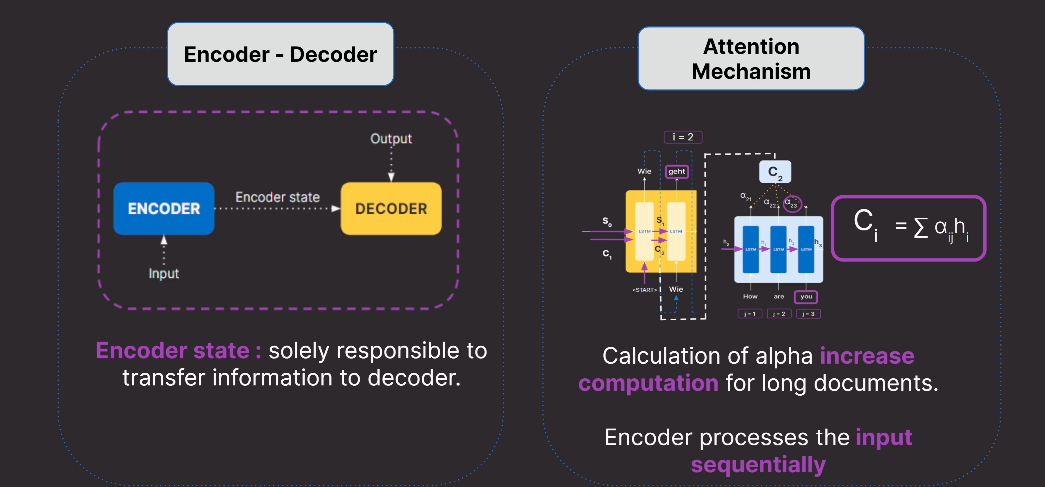

* The "raw LSTM" model uses the encoder-decoder architecture we see above.
  * The main drawback of the LSTM is the failure to capture LONG RANGE DEPENDENCIES (long sentences) during transfer of information from encoder to decoder.
* This is why ATTENTION is all you need!
  * The **key element of attention is the context vector**
    * What is the context vector?
      * **weighted sum of all the encoder's hidden states**
* Sequential processing is the MAIN DRAWBACK of the LSTM model.
  * Ideally we want parallel processing and that is where the Transformer came from

# Transformer Architecture
* The first thing we see is there is NO LSTM in the architecture -- allows parallel processing of model inputs.
* Different types of attention used:
  * 1. Encoder-Decoder attention
    * Dot product attention calculation parallelized.
    * Dot product attention
      * Q: query vector --> importance of relative words
      * K: key vector --> represents evaluated word
      * V: value vector --> contains focused information
  * 2. Self attention
  * 3. Masked attention
    * often used in decoder block only.
    * when predicting next token, only previous tokens are considered.
      * prevents the model from accessing future input.
      * FUTURE CONTEXT IS NEVER KNOWN
  * 4. Multi-head attention

# Flow of information through Transformer
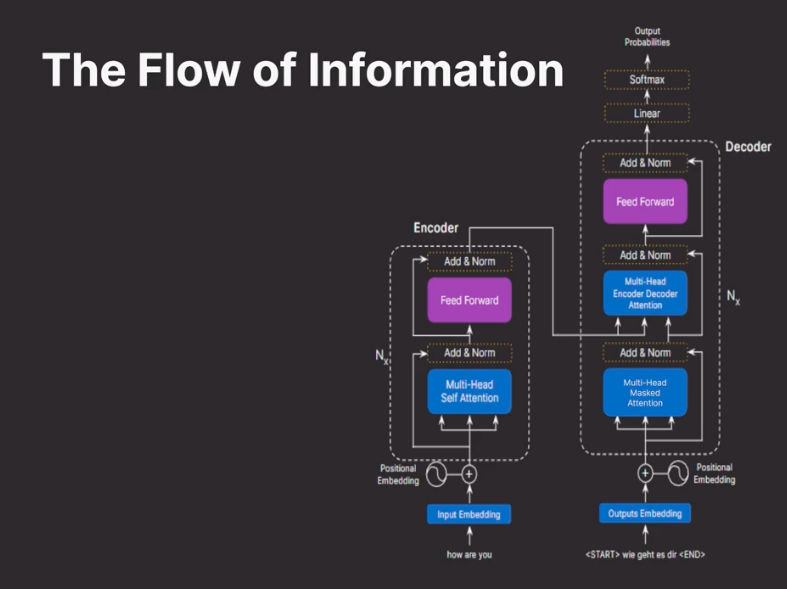


## Encoder information flow
* input --> word embeddings of tokens
  * similar to an LSTM model.
  * receives all tokens in single input.
* **Mult-Head Self Attention**
* Uses **positional embeddings** to learn position of words in the input sentences.
* P = Positional Embedding + Word Embedding
  * every input token has embedding vector created.
* Semantic + Positional information is captured --> passed through multi-head attention layer.
* Ouptut from multi-head self attention is added to positional embedding matrix P
  * "residual or skip connection"
  * helps mitigate vanishing gradient
  * similar to batch normalization
* Feed Forward network
  * same mechanism for add + norm
* Same process continues going into the Decoder.

## Decoder information flow
* There are 2 inputs to the decoder from the encoder.
  * **First input:** output matrix (from encoder)serves as the query and key matrix
  * **Second input:** predicted text
* Both inputs are embedded similar to encoder:
  * word embeddings
  * positional encodings
* **Multi-head Masked Attention**
  * **This step is where the decoder differentiates itself from the encoder.**
  * There is NO mult-head self attention!!
  * **This method instead focuses on relevant sentence parts without previewing future words.**
    * No matter what, the model is not allowed to see future words.
  * The resultant matrix is then added to the original matrix of the decoder part and then normalized - similar to encoder final steps.
  * 3 inputs to the multi-head encoder-decoder attention:
    * 1) Value vector from the encoder
    * 2) Key vector from the encoder
    * 3) Query vector after the first add and normalize step.
* Output matrix is passed through a feed forward neural network.
  * It is added to the resultant matrix from earlier add and norm step to get decoder stack output.
* Output of decoder is passed through linear layer followed by a softmax layer to get prediction.

* **Note: in original paper, both encoder and decoder each had 6 stacked blocks.**


# Historical Timeline

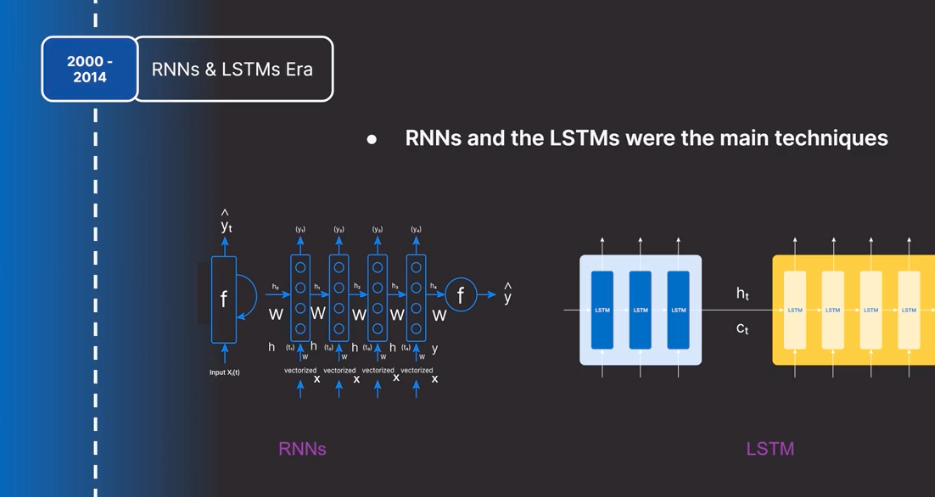

2014
* 2 key publications debuted:

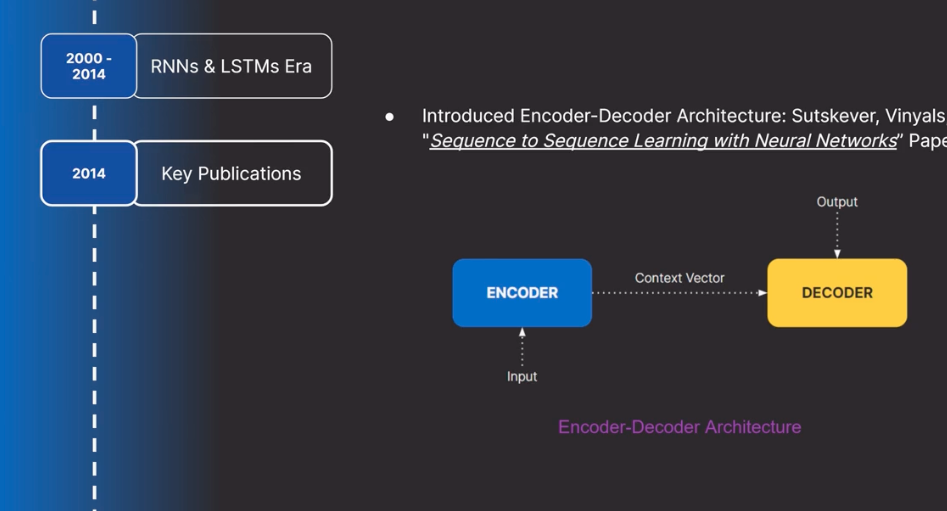

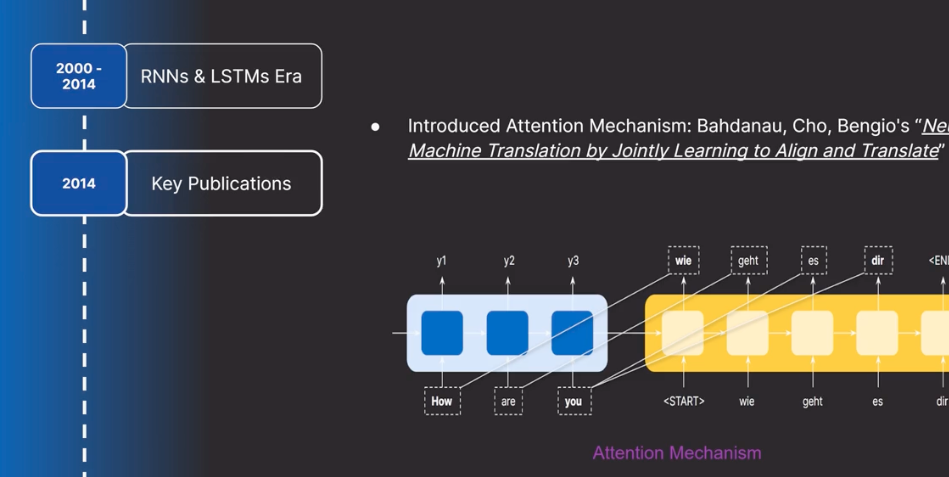

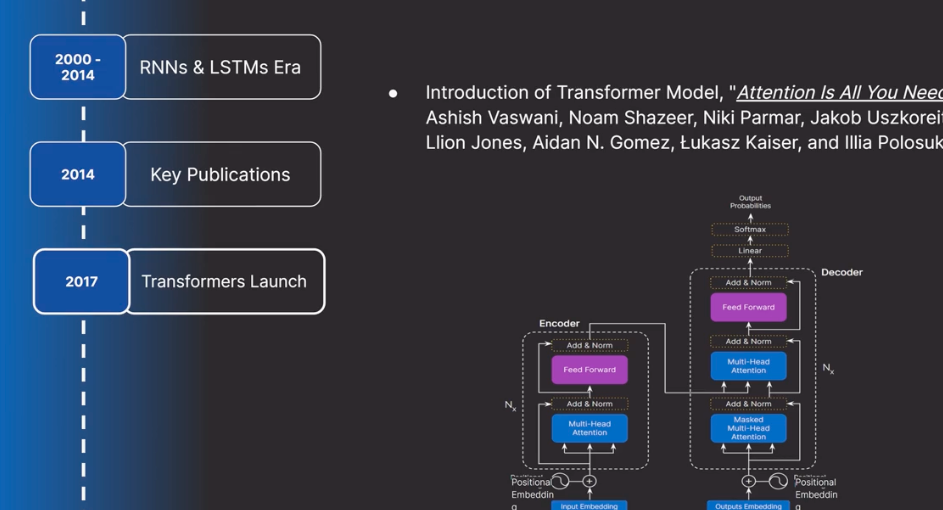

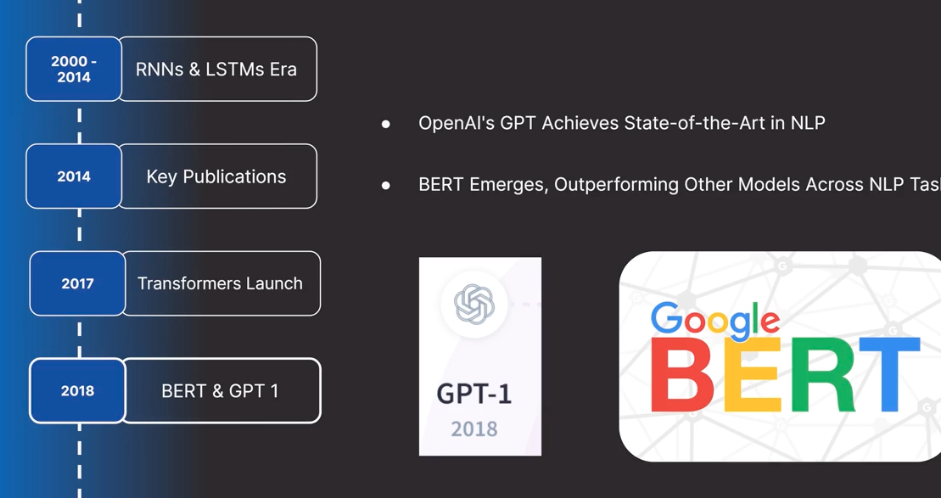

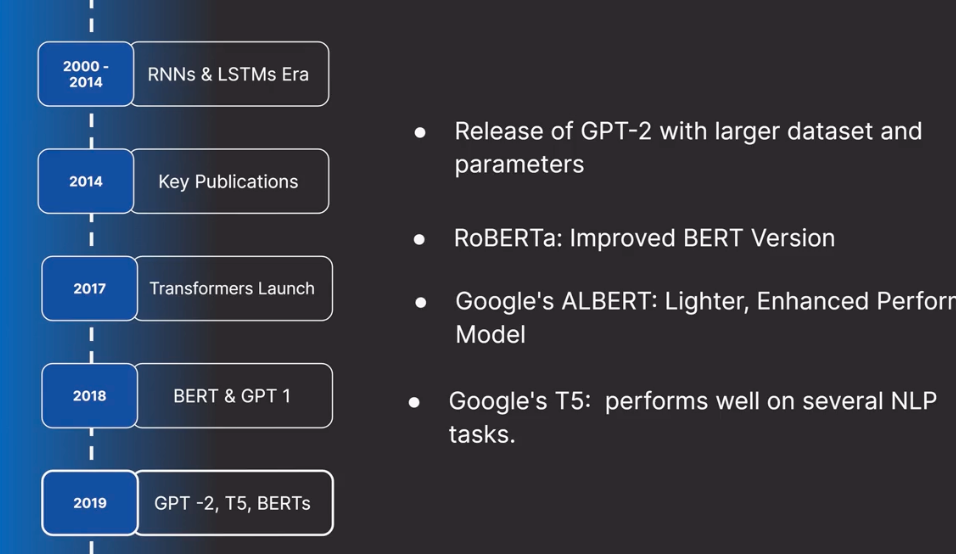

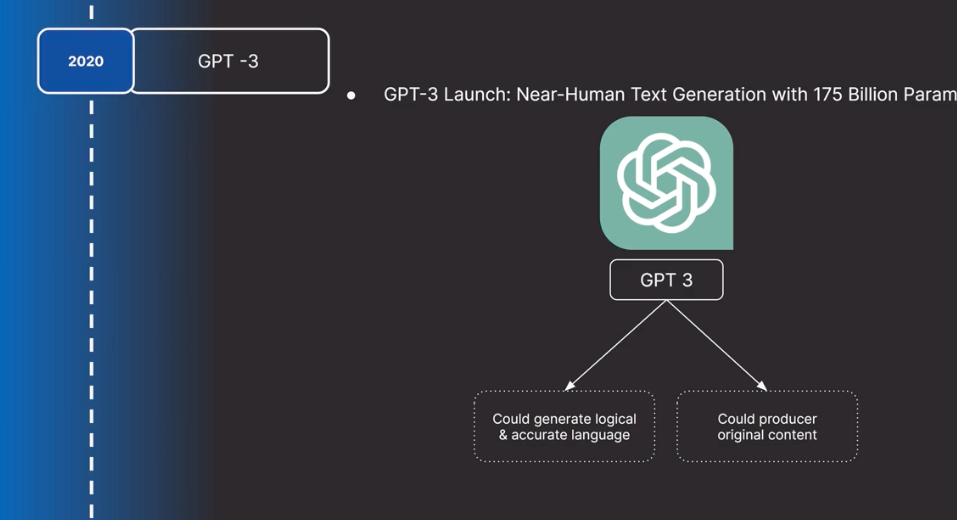

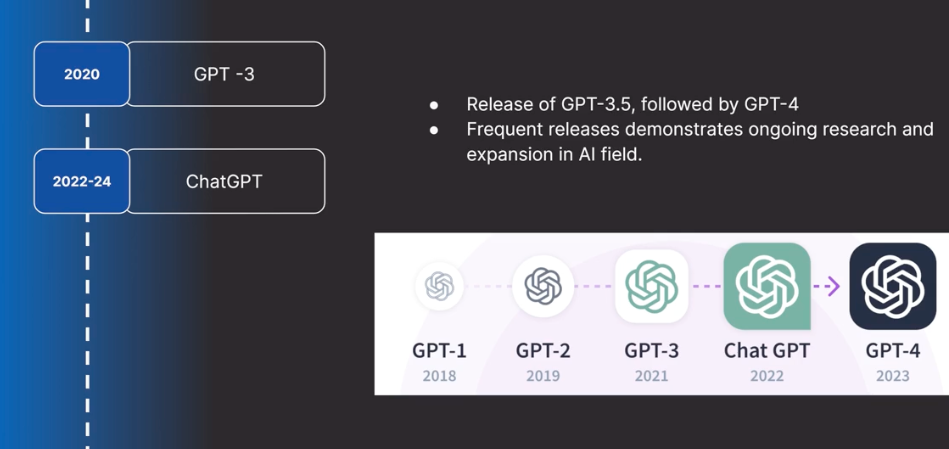

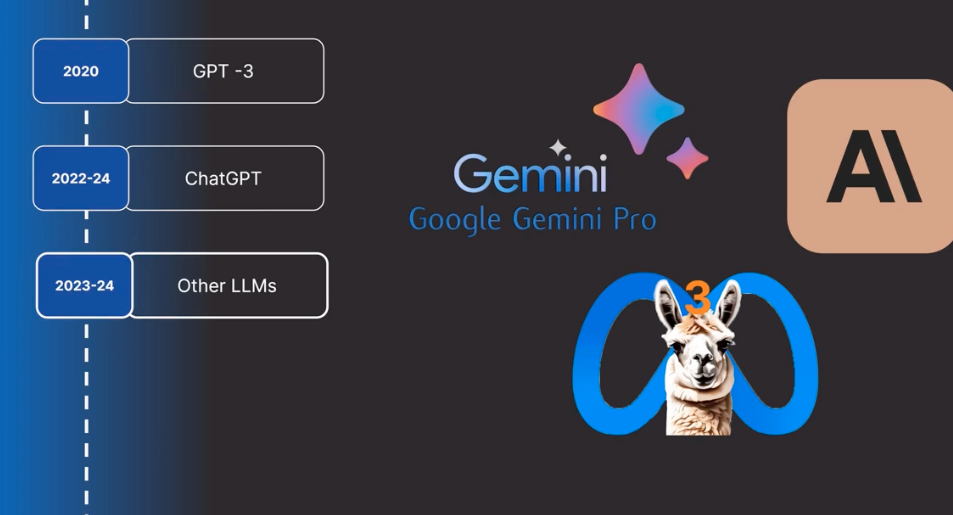

Note: Google released BART which is now known as "Gemini Pro".

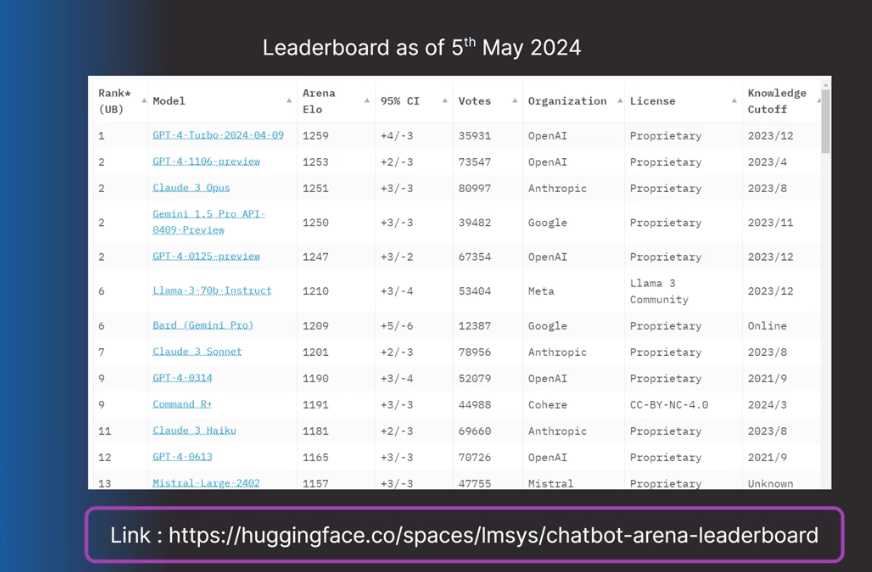

# BERT Overview
* Bidirectional Encoder Representations from Transformers.
* This method considers BOTH left and right context of words in a sentence.

## BERT Architecture
* BERT is ONLY made up of encoders.
* We can see below the difference between `bert-base` and `bert-large`.
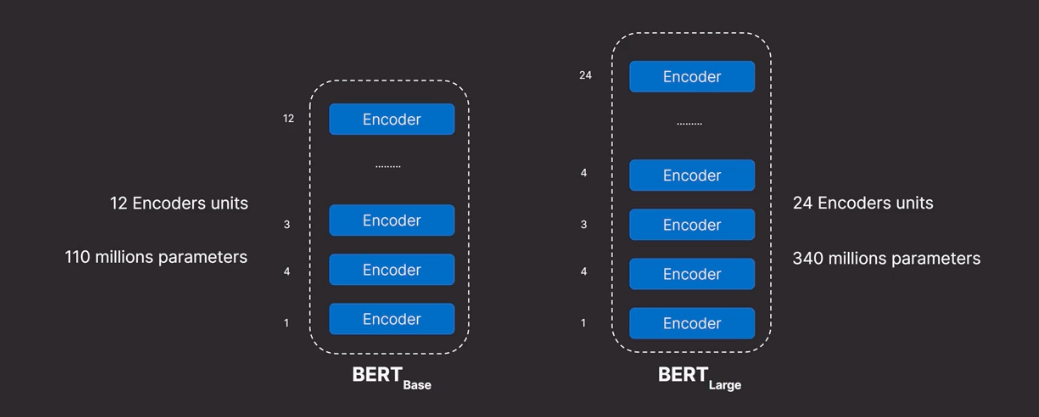

## BERT embeddings
* More complex than the original transformer encoder.
* Original transformer has **token/word embeddings** and **positional embeddings**
* BERT uses those 2 plus another:
  * 1) Token embeddings - word-level
  * 2) Positional embeddings - position
  * 3) Segment embeddings - distinguish between 2 sentences in a single input.
    * Segment embeddings are required to train BERT on the next-sentence prediction task.
* BERT also requires SPECIFIC input tokens:
  * 1) CLS - classifier token always at beginning.
  * 2) SEP - separator token to separate sequences, phrases, sentences.

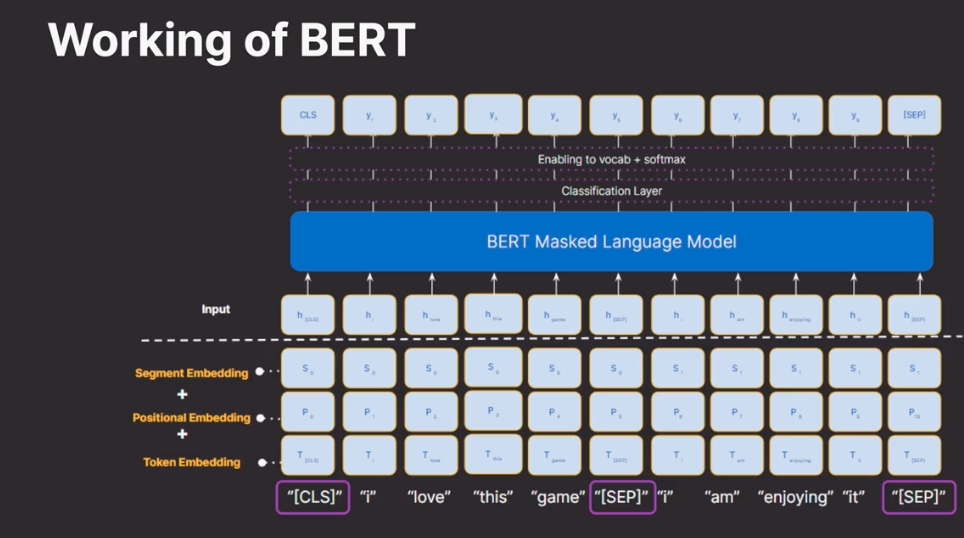


Output of the 12th or final encoder is the final output:
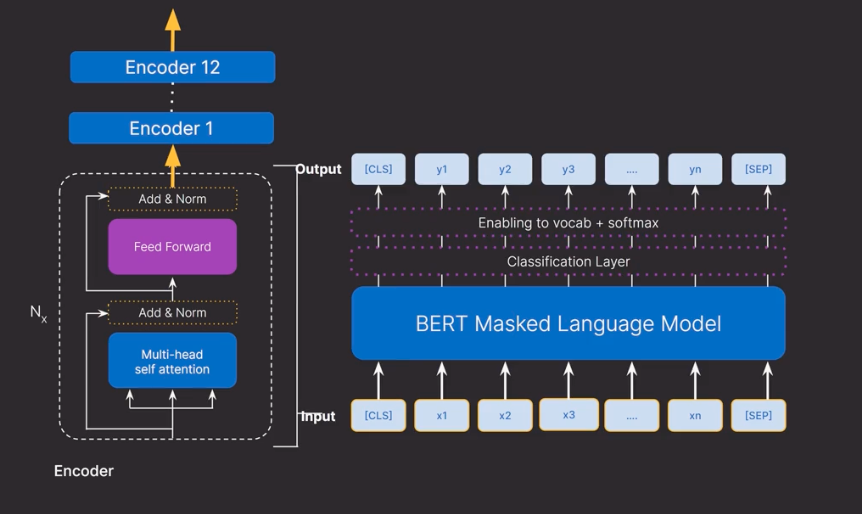

## 2 key aspects related to BERT
1. Pre-training
  * large volumes of data
  * Datasets:
    * Wikipedia of 2500 million words
    * Book corpus data of 800 million words
  * 2 training strategies:
    * 1) Masked language modeling (MLM)
      * **Concept: contextual understanding.**
      * BERT masks and replaces some words in the input sequences with symbols like `[MASK]` to be predicted by the model.
      * The model then has to predict or figure out what the hidden or masked words are in sequence.
      * Loss function during model training only considers prediction of the masked values.
    * 2) Next sentence prediction (NSP)
      * **Concept: understanding relationships between sentences**
      * given a pair of sentences, BERT has to identify whether 1 sentence logically follows the next or not.
  * **BOTH MLM and NSP in training is important to making BERT a powerful model.**
2. Fine-tuning
  * pre-training customizes use case such as:
    * 1) Text classification
    * 2) Sentiment Analysis
    * 3) NER
    * 4) POS tagging
    * ...etc...

## 3 primary methods for Fine-tuning a pre-trained model
1. **Output layer tuning**
  * **Task specific outer layer** is trained while freezing the lower layers.
2. **Full model fine tuning**
  * Fine tuning **all the layers** of the model.
  * Effective for LARGE dataset.
3. **Feature Extraction**
  * Domain adaption helps the model in feature extraction.
  * Fine tuning on specfic tasks.



# GLUE
* General Language Understanding Evaluation
* Measures performance of models on various language understanding challenges.
* Serves as a benchmark for evaluation such as:
  * 1) semantic textual similarity (STS)
  * 2) natural language inference (NLI)
  * 3) question-answer pairs (Q&A)
  * 4) contextual entailment
  * ..etc...
* Here is the leaderboard: https://gluebenchmark.com/leaderboard/